In [1]:
import pandas as pd


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from statistics import mean, stdev

In [6]:
from sklearn.model_selection import StratifiedKFold

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
from sklearn.svm import SVC

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
pip install lightgbm 

Note: you may need to restart the kernel to use updated packages.


In [22]:
from lightgbm import LGBMClassifier

In [23]:
import warnings

In [25]:
warnings.filterwarnings("ignore",category=DeprecationWarning)

warnings.filterwarnings("ignore",category=UserWarning)

In [28]:
#dataset
data= pd.read_csv("C:/Users/HP/Downloads/diabetes.csv")

In [29]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN,NaN


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Unnamed: 9                0 non-null      float64
 10  Unnamed: 10               0 non-null      float64
dtypes: float64(4), int64(7)
memory usage: 66.1 KB


In [31]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,0.0,0.0
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,NaN,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,NaN,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,NaN,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,NaN,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,NaN,NaN
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,NaN,NaN


In [32]:
data.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,NaN,NaN
764,2,122,70,27,0,36.8,0.340,27,0,NaN,NaN
765,5,121,72,23,112,26.2,0.245,30,0,NaN,NaN
766,1,126,60,0,0,30.1,0.349,47,1,NaN,NaN


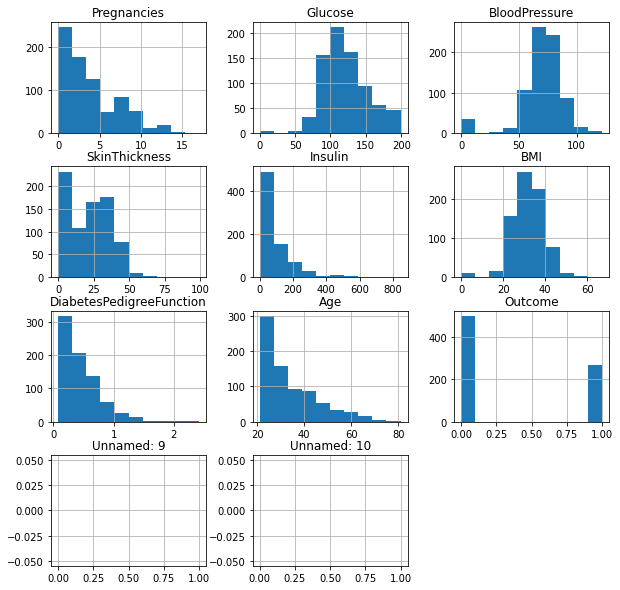

In [34]:
#exploratory data analysis
data.hist(bins= 10, figsize= (10,10))
plt.show()

In [35]:
#pregnencies, glucose,insulin, dabetespedegreefunction and age has normal distribution 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

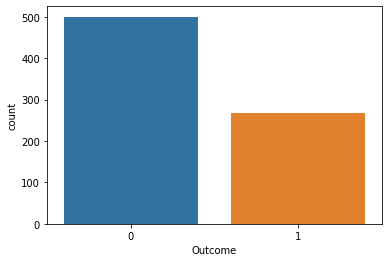

In [36]:
sns.countplot('Outcome',data=data)

In [37]:
#it can be seen that the number of people dont  have diabetes are more than number of people with diabetes.The ratio can be calucated as
print('ratio:',sum(data['Outcome'])/len(data['Outcome']))

ratio: 0.3489583333333333


<AxesSubplot:>

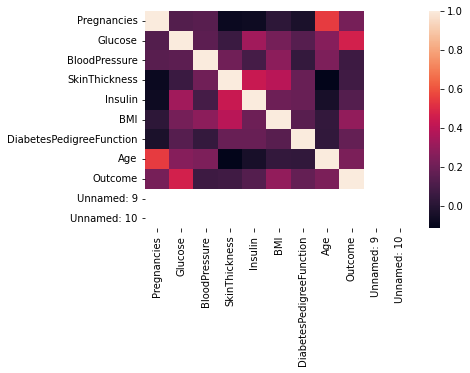

In [38]:
#to check correlation, plot the heatmap
sns.heatmap(data.corr())

In [39]:
#data modelling
X= data.drop(['Outcome'], axis=1).copy()

In [40]:
Y=data.loc[:,'Outcome']

In [41]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Unnamed: 9,Unnamed: 10
0,6,148,72,35,0,33.6,0.627,50,NaN,NaN
1,1,85,66,29,0,26.6,0.351,31,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,NaN,NaN
3,1,89,66,23,94,28.1,0.167,21,NaN,NaN
4,0,137,40,35,168,43.1,2.288,33,NaN,NaN


In [42]:
scaler= StandardScaler()
scaled_X= scaler.fit_transform(X)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


In [44]:
def train_model(model_name,model):
  
    # Create StratifiedKFold object.
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    accuracy = []
  
    for train_index, test_index in skf.split(X, Y):
        X_train_fold, X_test_fold = scaled_X[train_index], scaled_X[test_index]
        Y_train_fold, Y_test_fold = Y[train_index], Y[test_index]
        model.fit(X_train_fold, Y_train_fold)
        accuracy.append(model.score(X_test_fold, Y_test_fold))
  
    # Print the output.
    print(f'The model {model_name} has an Average Accuracy:',round(mean(accuracy)*100,2), '%')
    print('\nMaximum Accuracy that can be obtained:',round(max(accuracy)*100,2), '%')
    print('\nStandard Deviation:', stdev(accuracy))


In [45]:
models = {}
models["'Logistic Regression'"] = LogisticRegression(random_state = 12345)
models["'K Nearest Neighbour'"] = KNeighborsClassifier()
models["'Decision Tree'"] = DecisionTreeClassifier(random_state = 12345)
models["'Random Forest'"] = RandomForestClassifier(random_state = 12345)
models["'SVM'"] = SVC(gamma='auto', random_state = 12345)
models["'XGB'"] = GradientBoostingClassifier(random_state = 12345)
models["'LightGBM'"] = LGBMClassifier(random_state = 12345)

In [46]:
for key, values in models.items():
    train_model(key,values)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').